In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
import pickle

In [12]:
pops = []

with open("cases/maleckar/output_rtol/backup.pickle", "rb") as f:
    pops.append(pickle.load(f))
    
with open("cases/maleckar/output_rtol_continue/backup_1.pickle", "rb") as f:
    pops.append(pickle.load(f))
    
with open("cases/maleckar/output_rtol_continue/backup_2.pickle", "rb") as f:
    pops.append(pickle.load(f))
    
with open("cases/maleckar/output_rtol_continue/backup.pickle", "rb") as f:
    pops.append(pickle.load(f))
    
with open("cases/maleckar/output_rtol_continue_2/backup.pickle", "rb") as f:
    pops.append(pickle.load(f))
    
#with open("cases/maleckar/output_MOP_copy/backup.pickle", "rb") as f:
#    pops.append(pickle.load(f))

In [13]:
population = pops[-1]
states = np.dstack([x['state'] for x in reversed(population)])

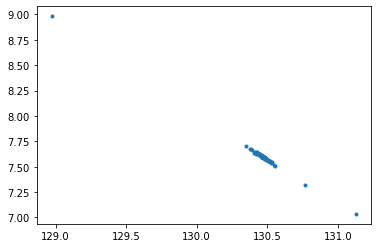

In [14]:
plt.plot(states[0, 11, :], states[0, 2, :], '.')

In [6]:
population

[{'genes': array([1.00747138, 0.98027943, 1.0142925 , 0.94641115, 0.96540818,
         0.97045479, 0.4016948 , 0.79690261, 1.04302238, 0.94424543,
         1.47001194, 1.06064621, 1.02860029, 0.98822884]),
  'state': array([[-7.30896911e+01,  1.30015933e+02,  7.52627960e+00,
           3.68706289e-03,  8.56863283e-01,  8.56472187e-01,
           6.02207069e-05,  1.58889942e-05,  9.98397990e-01,
           9.98395656e-01,  5.62240971e+00,  1.30532525e+02,
           1.18668776e-03,  9.44464218e-01,  4.09187305e-04,
           9.80719440e-01,  1.73362047e-03,  6.24765220e-05,
           1.81421063e+00,  5.05499199e-05,  2.07978919e-02,
           1.00088921e-02,  1.52643670e-01,  7.47755246e-01,
           1.37568233e+00,  5.13235862e-01,  5.18347952e-01,
           3.81150223e-01,  7.29079985e-01,  1.87302155e-03],
         [-7.27337687e+01,  1.30009031e+02,  8.18169881e+00,
           3.84979709e-03,  8.48132356e-01,  8.43886773e-01,
           7.10234081e-05,  1.68970757e-05,  9.98314

In [15]:
states_list = []
fitness_list = []

for population in pops:
    states = np.dstack([x['state'] for x in reversed(population)])
    states = states.reshape(-1, states.shape[-1]).T
    fitness = np.concatenate([[x['fitness']] for x in reversed(population)])
    states_list.append(states)
    fitness_list.append(fitness)

In [16]:
states = np.vstack(states_list)

In [17]:
fitness = np.hstack(fitness_list)

In [18]:
states = StandardScaler().fit_transform(states)

In [19]:
pca = PCA(n_components=2)
pca.fit(states)

y = pca.transform(states)
print(sum(pca.explained_variance_ratio_))
#print(pca.singular_values_)

#plt.plot(pca.explained_variance_ratio_, '.-')

0.6679177697410527


In [20]:
y_list = np.split(y, len(pops))
fitness_list = np.split(fitness, len(pops))

In [21]:
len(y_list)

5

In [22]:
cmaps = ['viridis_r', 'plasma_r', 'inferno_r', 'magma_r', 'cividis_r']

In [23]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [31]:
n_elites = 144

for i, y in enumerate(y_list[:]):
    
    c = np.log(-fitness_list[i])
    vmin = np.min(np.log(-fitness))
    vmax = np.max(np.log(-fitness))

    plt.scatter(y[:-n_elites, 0], y[:-n_elites, 1],
                c='k', s=4)#, # c=c[:-n_elites], s=9, cmap='BuPu',
                #vmin=vmin, vmax=vmax)
        
    plt.scatter(y[:144, 0], y[:144, 1],
                marker='+', c='white', s=1)#, # c=c[:-n_elites], s=9, cmap='BuPu',
                #vmin=vmin, vmax=vmax)

    
    plt.scatter(y[-n_elites:, 0], y[-n_elites:, 1],
                c=c[-n_elites:], s=16, cmap=cmaps[i])#,
                #vmin=vmin, vmax=vmax)
    
    plt.plot(y[-1, 0], y[-1, 1], 'rx')
    
plt.colorbar()
plt.show()

TypeError: bad operand type for unary -: 'list'

In [25]:
plt.hist(fitness.flatten())

(array([1.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 3.000e+00,
        1.000e+00, 2.200e+01, 3.200e+01, 7.132e+03]),
 array([-297.22321568, -267.57454601, -237.92587633, -208.27720665,
        -178.62853697, -148.9798673 , -119.33119762,  -89.68252794,
         -60.03385826,  -30.38518859,   -0.73651891]),
 <a list of 10 Patch objects>)

In [30]:
plt.plot(fitness_list[-1])
plt.axvline(1440 - 144, color='k', ls='--')

# Dump

In [27]:
dump = np.fromfile("cases/maleckar/output_rtol_continue_2/dump.bin")
dump = dump.reshape((-1, 1440, 15))

In [28]:
n = 3

for epoch in range(len(dump) - (n - 1)):
    array = dump[epoch: epoch + n]
    array = array[:, ::-1]
    array = array.reshape((-1, dump.shape[2]))
    coeffs, fitness = np.split(array, [-1], axis=1)
    #coeffs, fitness = np.log(coeffs), np.log(-fitness)
    coeffs = StandardScaler().fit_transform(coeffs)
    pca = PCA(n_components=2)
    coeffs = pca.fit_transform(coeffs)
    print(pca.explained_variance_ratio_)
    
    coeffs, fitness = np.split(coeffs, n), np.split(fitness, n)
    for i, (c, f) in enumerate(zip(coeffs, fitness)):
        plt.plot(c[:, 0], c[:, 1], '.', color=f'C{(epoch + i) % n}')
        plt.plot(c[-1, 0], c[-1, 1], 'o', color=f'C{(epoch + i) % n + n}', zorder=10)

        
    plt.axis([-10, 10, -10, 10])
    plt.show()
    
#y = pca.transform(states)
#print(pca.explained_variance_ratio_[:-10])

[0.24595061 0.18900381]


In [29]:
plt.plot(fitness[0])

In [116]:
dump[0, -1]

array([   0.40194657,    3.38694871,    1.30630074,    3.50577566,
          0.44868273,    3.03371628,    0.95298552,    1.89222041,
          3.77682022,    0.75140366,    0.25580923,    2.44600628,
          0.53662943,    1.09273083, -247.2815791 ])